In [22]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [24]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

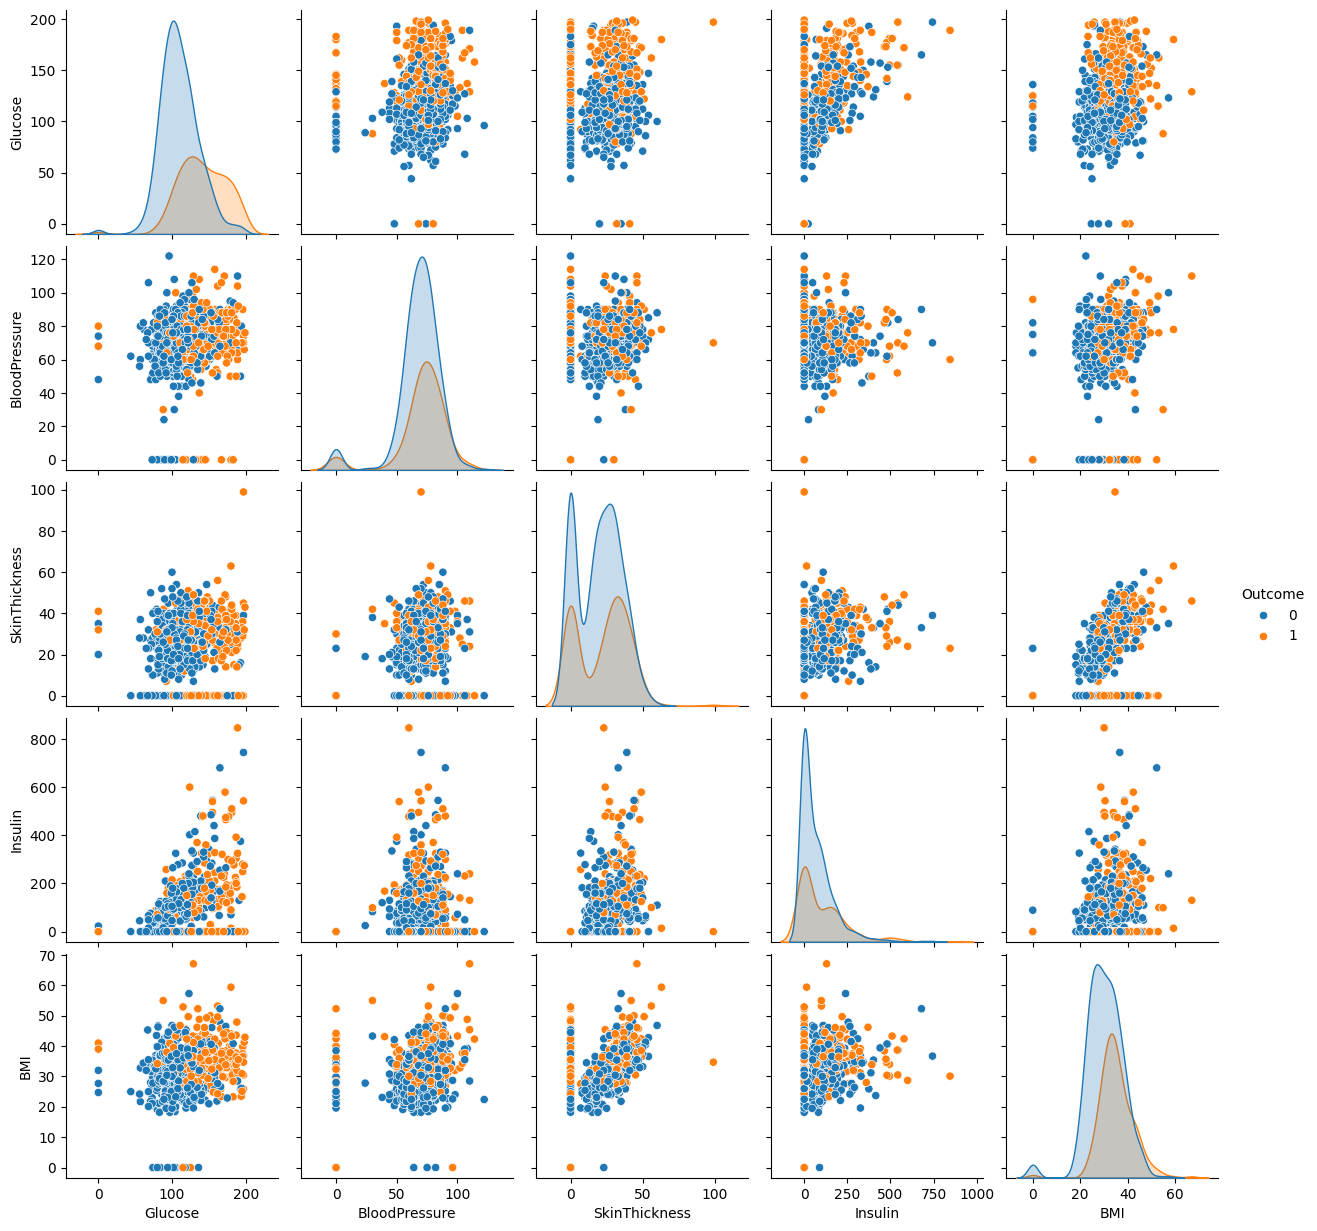

In [26]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness',	'Insulin', 'BMI'],
            hue ='Outcome')
plt.show()

In [27]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [28]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [31]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [32]:
# 훈련 데이터와 테스트 데이터(X/y)를 병합하여 시퀀스 변환 함수를 적용합니다.
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

#훈련 데이터와 테스트 데이터 모두에 대해 25의 시간 단계를 사용하여 시퀀스 변환을 적용합니다. 
#모든 센서 모달리티는 50 Hz의 샘플링 속도로 기록되며, 이는 인간 활동을 포착하기에 충분하다고 간주됩니다."

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(687, 5, 8) (687,)
(73, 5, 8) (73,)


In [33]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [34]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [35]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [36]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 3, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,082 (55.01 KB)

 Trainable params: 14,082 (55.01 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5963 - loss: 4.0760 - val_accuracy: 0.6087 - val_loss: 2.7058
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6334 - loss: 1.6072 - val_accuracy: 0.6812 - val_loss: 1.6032
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6901 - loss: 0.9414 - val_accuracy: 0.6667 - val_loss: 1.3677
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6953 - loss: 0.8731 - val_accuracy: 0.7101 - val_loss: 1.1918
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7346 - loss: 0.6631 - val_accuracy: 0.6232 - val_loss: 1.2115
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6924 - loss: 0.7172 - val_accuracy: 0.6812 - val_loss: 1.5689
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7768 - loss: 0.6682 - val_accuracy: 0.6522 - val_loss: 1.1374
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7670 - loss: 0.6263 - val_accuracy: 0.6232 - val_lo

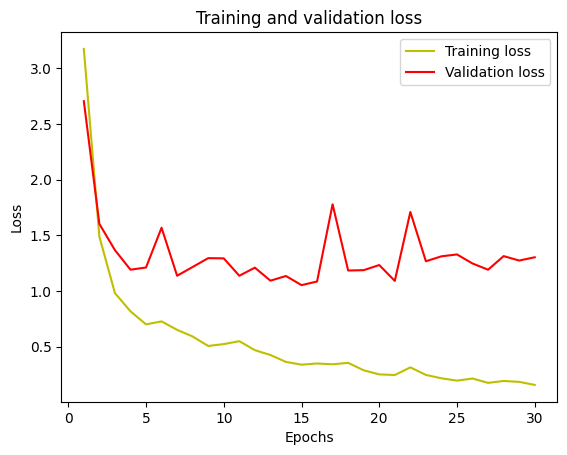

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

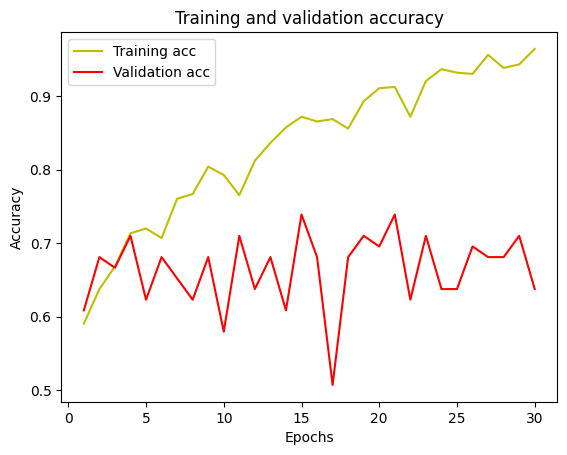

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        45
           1       0.55      0.57      0.56        28

    accuracy                           0.66        73
   macro avg       0.64      0.64      0.64        73
weighted avg       0.66      0.66      0.66        73

[[32 13]
 [12 16]]


In [42]:
model_file = 'C:\\AIdata\\my_cnn_model.h5'  # 모델을 저장할 경로

# 모델 저장
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('모델이 저장되었습니다:', model_file)


모델이 저장되었습니다: C:\AIdata\my_cnn_model.h5


# *전이 학습 및 미세 조정*

In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten

In [62]:
model_file = 'C:\\AIdata\\my_cnn_model.h5'

In [63]:
base_model = keras.models.load_model(model_file)  # 모델 파일에서 불러오기

In [64]:
base_model.trainable = False 

In [65]:
base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
new_input = keras.Input(shape=base_model.input_shape[1:])

In [67]:
x = base_model(new_input)  # 기존 모델을 통한 출력

In [69]:
x = Flatten()

In [70]:
x = Dense(64, activation='relu') # 추가 층

In [71]:
output = Dense(2, activation='sigmoid')

In [73]:
new_model = keras.Model(input_layer, outputs)

In [74]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
train_epochs = 30
history = new_model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True, validation_split=0.1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9036 - loss: 0.2619 - val_accuracy: 0.6812 - val_loss: 1.6425
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9326 - loss: 0.2193 - val_accuracy: 0.6667 - val_loss: 1.3292
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9577 - loss: 0.1601 - val_accuracy: 0.6522 - val_loss: 1.3935
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9568 - loss: 0.1767 - val_accuracy: 0.6812 - val_loss: 1.3817
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9782 - loss: 0.1275 - val_accuracy: 0.6957 - val_loss: 1.5287
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9807 - loss: 0.1072 - val_accuracy: 0.6667 - val_loss: 1.5973
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9621 - loss: 0.1282 - val_accuracy: 0.6377 - val_loss: 1.5353
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9503 - loss: 0.1594 - val_accuracy: 0.6377 - val_los

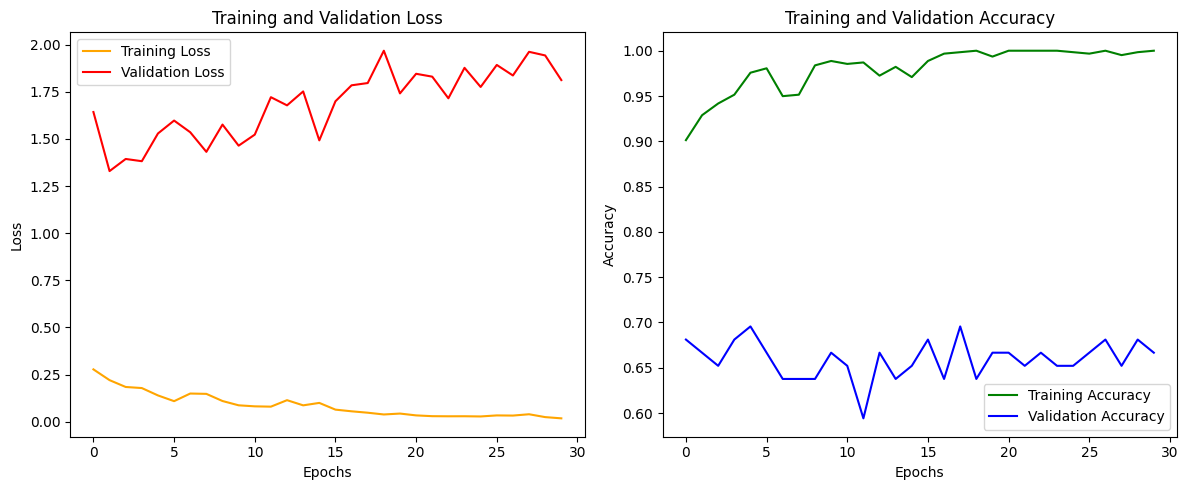

In [76]:
import matplotlib.pyplot as plt

# 손실 값 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 서브플롯
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 서브플롯
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 출력


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# 테스트 데이터에 대한 예측 수행
y_pred = new_model.predict(X_test)  # X_test에 대한 예측
y_pred_class = np.argmax(y_pred, axis=1)  # 예측된 클래스 (확률 값에서 최대값의 인덱스)

# 실제 클래스
y_test_class = np.argmax(y_test_onehot, axis=1)  # y_test_onehot에서 실제 클래스

# 정확도 및 분류 보고서 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Confusion Matrix:
[[37  8]
 [12 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        45
           1       0.67      0.57      0.62        28

    accuracy                           0.73        73
   macro avg       0.71      0.70      0.70        73
weighted avg       0.72      0.73      0.72        73

